In [52]:
%load_ext autoreload
%autoreload 2

#%pylab notebook
%matplotlib inline
from pylab import *
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rcParams["figure.facecolor"] = 'white'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
rcParams['figure.dpi'] = 150
rcParams["figure.facecolor"] = 'white'

In [54]:
import argparse, sys, numpy as np, scipy as sc, os
sys.path.append('/Users/sraghunathan/Research/SPTPol/analysis/git/DRAFT/modules/')
import foregrounds_with_scalings as fg

In [114]:
#params
freqarr = [30, 44, 70, 95, 100, 143, 150, 217, 220, 353]#, 545, 857]
#freqarr = [353, 545, 857]
only_auto_spectra = 1
freq0 = 150
lmax = 1e4
fg_model = 'reichardt' 
#fg_model = 'george'
if fg_model == 'george':
    fg_model_type = 'G15'
    spec_index_rg = -0.9##-0.9869688 ##-0.9
    spec_index_dg_po = 1.505 ##1.506845 ##1.505
    spec_index_dg_clus = 2.51 ##2.536784 ##2.51
    dg_clus_template_id = 1
    cib_temp = 20.
elif fg_model == 'reichardt':
    fg_model_type = 'R20'
    spec_index_rg = -0.76 ##-0.817
    spec_index_dg_po = 1.48 ##1.41
    spec_index_dg_clus = 2.23 ##2.29
    dg_clus_template_id = 0
    cib_temp = 25.


#amplitude scaling factors from Zhaodi Pan
if fg_model == 'reichardt':
    scaling_factors = {
    'DG':{95: 0.98, 150: 0.94, 220: 1.02},
    'RG':{95: 1.00, 150: 1.04, 220: 1.01},
    'tSZ': {95: 1.01, 150: 1.05, 220: 1.02},
    }
elif fg_model == 'george':
    scaling_factors = {
    'DG': {95: 0.962, 150: 0.933, 220: 1.052},
    'RG': {95: 1.040, 150: 1.047, 220: 1.002},
    'tSZ': {95: 1.011, 150: 1.059, 220: 4.574},
    }        


In [121]:
def fn_normalize(data,Nmin=0.,Nmax=1.):
    
    data = np.asarray( data )

    arrmin,arrmax=min(data),max(data)
    normed_data=(data-arrmin)/(arrmax-arrmin)
    normed_data=normed_data*Nmax+Nmin

    return normed_data

#for plotting
#same as Fig.3 of G15 https://arxiv.org/pdf/1408.3161.pdf
ymin, ymax = 0.5, 1e3
xmin, xmax = 2e3, 12e3

xmin, xmax = 10, 12e3
ymin, ymax = 0.5, 1e5

#get the colours for different frequencies
if (0):#only_auto_spectra: 
    freq_arr_norm = fn_normalize(freqarr, Nmin=0.,Nmax=255.)
    colorarr = [cm.jet(int(d)) for d in freq_arr_norm]
    colordic = {}
    for cntr, freq in enumerate( sorted(freqarr) ):
        colordic[(freq,freq)] = colorarr[cntr]
else:
    colorarr = [cm.jet(int(d)) for d in np.linspace(0, 255, len(freqarr)**2)]
    colordic = {}
    cntr = 0
    for freq1 in sorted(freqarr):
        for freq2 in sorted(freqarr):
            if (freq2, freq1) in colordic: colordic[(freq1,freq2)] = colordic[(freq2,freq1)]
            colordic[(freq1,freq2)] = colorarr[cntr]
            cntr += 1

In [122]:
def fn_return_eff_bands(freq0, which_spt_0, freq1, freq2, which_spt_1, fg_component):

    band0 = '%dGHz' %(freq0)
    band1 = '%dGHz' %(freq1)
    band2 = '%dGHz' %(freq2)  
    
    #ref. frequency for reference band and ref. SPT experiment
    freq0_eff = fg.get_spt_effective_frequencies(which_spt_0, band0, fg_component)

    #get effective band centres for new SPT experiment at freq1, freq2
    freq1_eff = fg.get_spt_effective_frequencies(which_spt_1, band1, fg_component)
    freq2_eff = fg.get_spt_effective_frequencies(which_spt_1, band2, fg_component)

    return freq0_eff, freq1_eff, freq2_eff

153.4 30.0 30.0 0.0033793166912683818
153.4 44.0 44.0 0.010775833071539223
153.4 70.0 70.0 0.047059836568760366
153.4 95.0 95.0 0.1359174707030598
153.4 100.0 100.0 0.16436113044245465
153.4 143.0 143.0 0.7184543914449656
153.4 150.0 150.0 0.8981668924329242
153.4 217.0 217.0 6.955096979796037
153.4 220.0 220.0 7.608837540074136
153.4 353.0 353.0 411.4376180614567
153.4 30.0 30.0 0.0033793166912683818
153.4 44.0 44.0 0.010775833071539223
153.4 70.0 70.0 0.047059836568760366
153.4 95.0 95.0 0.1359174707030598
153.4 100.0 100.0 0.16436113044245465
153.4 143.0 143.0 0.7184543914449656
153.4 150.0 150.0 0.8981668924329242
153.4 217.0 217.0 6.955096979796037
153.4 220.0 220.0 7.608837540074136
153.4 353.0 353.0 411.4376180614567


<Figure size 900x600 with 0 Axes>

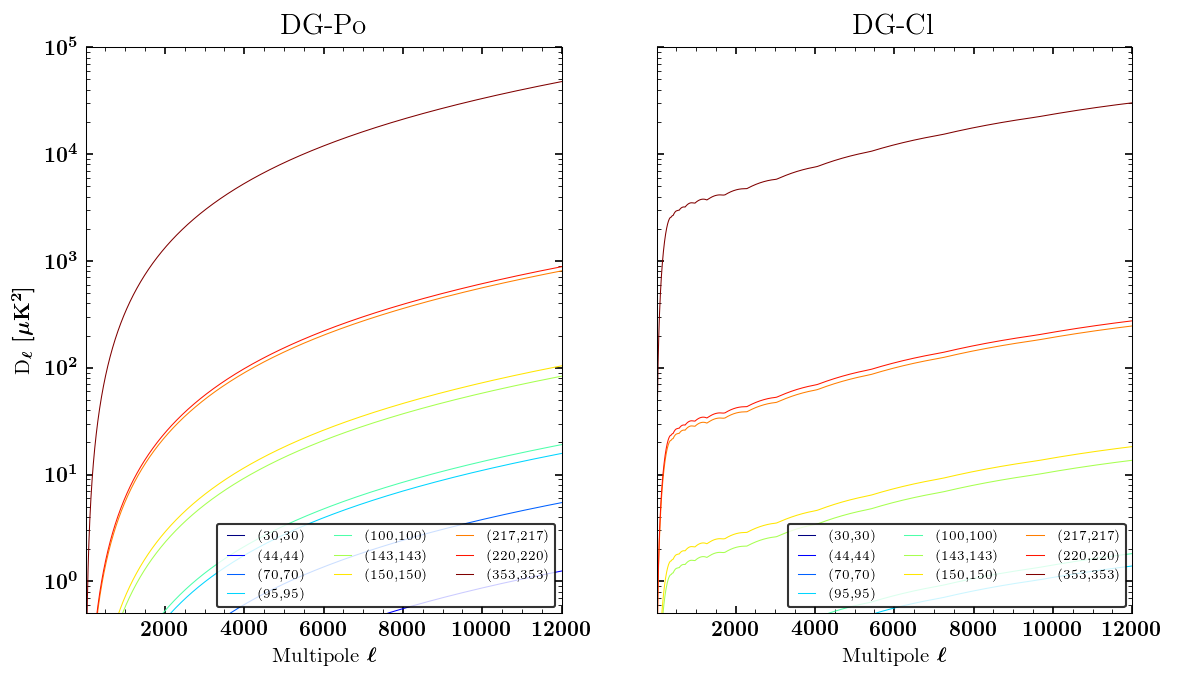

In [123]:
#DG galaxies
clf()
fig = figure(figsize=(9., 5.))
for fgcntr in range(2): #DG-Po, DG-Cl
    ax =subplot(1,2,fgcntr+1, yscale = 'log')
    for iter in range(1):
        for freq1 in sorted(freqarr):
            for freq2 in sorted(freqarr):
                
                if only_auto_spectra and freq1 != freq2: continue

                #freq0_eff, freq1_eff, freq2_eff = fn_return_eff_bands(freq0_ghz, fg_model, freq1, freq2, fg_model, 'DG')
                freq0_eff, freq1_eff, freq2_eff = freq0, freq1, freq2

                band1, band2 = '%dGHz'%(freq1), '%dGHz' %(freq2)
                band0 = '%dGHz' %(freq0)


                lwval = 0.5
                alphaval = 1.
                lsval = '-'
                labval = r'(%s,%s)' %(freq1, freq2)
                el, cl_dg_po, cl_dg_clus = fg.get_cl_dusty_galaxies(freq1_eff, freq2_eff, band0 = band0, fg_model = fg_model, spec_index_dg_po = spec_index_dg_po, spec_index_dg_clus = spec_index_dg_clus, dg_clus_template_id = dg_clus_template_id, cib_temp = cib_temp, return_ells = 1)

                dl_fac = el * (el+1) / 2/ np.pi

                if fgcntr == 0:                    
                    plot(el, cl_dg_po * dl_fac, ls = lsval, lw = lwval, label = labval, color = colordic[(freq1, freq2)], alpha = alphaval)
                else:
                    plot(el, cl_dg_clus * dl_fac, ls = lsval, lw = lwval, label = labval, color = colordic[(freq1, freq2)], alpha = alphaval)
    
    xlim(xmin, xmax)
    ylim(ymin, ymax)
    xlabel(r'Multipole $\ell$');
    if fgcntr == 0:
        tit = 'DG-Po'
        legend(loc = 4, ncol = 3, fontsize = 6)
    else:
        tit = 'DG-Cl'
        legend(loc = 4, ncol = 3, fontsize = 6)
    title(r'%s' %(tit), fontsize = 14)
    if fgcntr == 0:
        ylabel(r'D$_{\ell}\ [\mu {\rm K}^{2}]$')
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)


In [ ]:
#Radio galaxies
ax = subplot(111, yscale = 'log')
for iter in range(1):
    for freq1 in sorted(freqarr):
        print(freq1)
        for freq2 in sorted(freqarr):

            if only_auto_spectra and freq1 != freq2: continue
            
            #freq0_eff, freq1_eff, freq2_eff = fn_return_eff_bands(freq0, fg_model, freq1, freq2, fg_model, 'RG')
            freq0_eff, freq1_eff, freq2_eff = freq0, freq1, freq2

            band1, band2 = '%dGHz'%(freq1), '%dGHz' %(freq2)
            band0 = '%dGHz' %(freq0)
            
            alphaval = 1.
            lsval = '-'
            lwval = 0.5
            labval = r'(%s,%s)' %(freq1, freq2)
            el, cl = fg.get_cl_radio(freq1_eff, freq2_eff, band0 = band0, fg_model = fg_model, spec_index_rg = spec_index_rg, return_ells = 1)
                
            dl_fac = el * (el+1) / 2/ np.pi

            plot(el, cl * dl_fac, ls = lsval, lw = lwval, label = labval, color = colordic[(freq1, freq2)], alpha = alphaval)
xlim(xmin, xmax)
ylim(ymin, ymax)
xlabel(r'Multipole $\ell$'); ylabel(r'D$_{\ell}\ [\mu {\rm K}^{2}]$')
legend(loc = 2, ncol = 3, fontsize = 8)
title(r'Radio', fontsize = 14)

In [ ]:
#tSZ
ax = subplot(111, yscale = 'log')
for iter in range(1):
    for freq1 in sorted(freqarr):
        for freq2 in sorted(freqarr):

            if only_auto_spectra and freq1 != freq2: continue
            
            #freq0_eff, freq1_eff, freq2_eff = fn_return_eff_bands(freq0_ghz, fg_model, freq1, freq2, fg_model, 'tSZ')
            freq0_eff, freq1_eff, freq2_eff = freq0, freq1, freq2
            print(freq0_eff, freq1_eff, freq2_eff)

            band1, band2 = '%dGHz'%(freq1), '%dGHz' %(freq2)
            band0 = '%dGHz' %(freq0)
            

            alphaval = 1.
            lsval = '-'
            lwval = 0.5
            labval = r'(%s,%s)' %(freq1, freq2)
            el, cl = fg.get_cl_tsz(freq1_eff, freq2_eff, band0 = band0, fg_model = fg_model, return_ells = 1)
            
            dl_fac = el * (el+1) / 2/ np.pi

            plot(el, cl * dl_fac, ls = lsval, lw = lwval, label = labval, color = colordic[(freq1, freq2)], alpha = alphaval)
xlim(xmin, xmax)
ylim(ymin, ymax)
xlabel(r'Multipole $\ell$'); ylabel(r'D$_{\ell}\ [\mu {\rm K}^{2}]$')
legend(loc = 2, ncol = 2, fontsize = 8)
title(r'tSZ', fontsize = 14)